# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

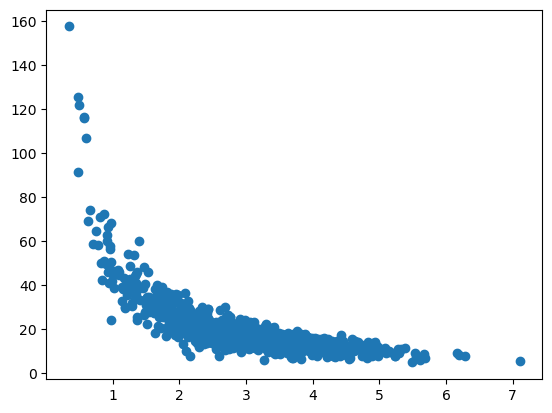

In [1]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)
plt.show()

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [2]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

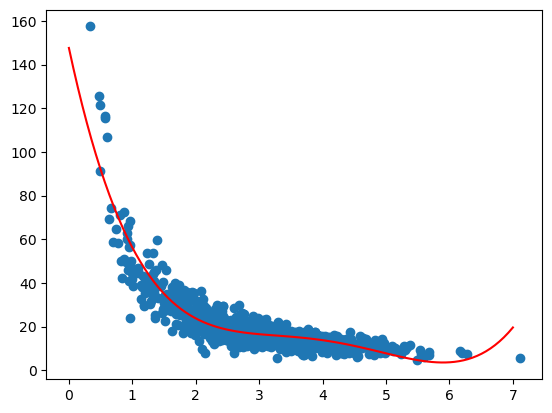

In [3]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [4]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.8293766396303073


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

In [6]:
%matplotlib qt
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)
fig = plt.figure()
ax = []
for i in range(1, 10):
    ax.append(fig.add_subplot(430 + i))
    ax[-1].title.set_text("n = " + str(i))
    p4 = np.poly1d(np.polyfit(x, y, i))
    xp = np.linspace(0, 7, 100)

    ax[-1].scatter(x, y)
    ax[-1].plot(xp, p4(xp), c='r')
    r2 = r2_score(y, p4(x))
    print("n =", i, r2)
plt.show()

n = 1 0.5024941304548026
n = 2 0.6927446350535892
n = 3 0.7842354030823269
n = 4 0.8293766396303073
n = 5 0.8553884386186104
n = 6 0.8700733999871766
n = 7 0.8778369781712083
n = 8 0.8814395663681477
n = 9 0.8830263256615989
